In [1]:
import visual_behavior_glm.GLM_params as glm_params
import visual_behavior_glm.GLM_analysis_tools as gat
import visual_behavior_glm.GLM_visualization_tools as gvt
from visual_behavior_glm.glm import GLM
import matplotlib.pyplot as plt
import visual_behavior.data_access.loading as loading
import visual_behavior.database as db
import plotly.express as px

import pandas as pd
import numpy as np
import os

import seaborn as sns

import visual_behavior.plotting as vbp

import plotly.graph_objects as go
import itertools

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
%widescreen

applied a custom magic command to make full use of screen width
will only work if command is defined locally
replace with the following to replicate functionality: 
	from IPython.core.display import display, HTML
	display(HTML("<style>.container { width:100% !important; }</style>")


In [3]:
glm_version = '10a_L2_optimize_by_session'
dropout_summary = gat.retrieve_results(search_dict = {'glm_version': glm_version}, results_type='summary')
results = gat.retrieve_results(search_dict = {'glm_version': glm_version}, results_type='full')

In [4]:
results

,_id,cell_specimen_id,Full__avg_cv_var_train,Full__avg_cv_var_test,Full__avg_cv_var_test_full_comparison,Full__avg_cv_adjvar_train,Full__avg_cv_adjvar_test,Full__avg_cv_adjvar_test_full_comparison,Full__absolute_change_from_full,Full__adj_dropout,Full__dropout,intercept__avg_cv_var_train,intercept__avg_cv_var_test,intercept__avg_cv_var_test_full_comparison,intercept__avg_cv_adjvar_train,intercept__avg_cv_adjvar_test,intercept__avg_cv_adjvar_test_full_comparison,intercept__absolute_change_from_full,intercept__adj_dropout,intercept__dropout,time__avg_cv_var_train,time__avg_cv_var_test,time__avg_cv_var_test_full_comparison,time__avg_cv_adjvar_train,time__avg_cv_adjvar_test,time__avg_cv_adjvar_test_full_comparison,time__absolute_change_from_full,time__adj_dropout,time__dropout,passive_change__avg_cv_var_train,passive_change__avg_cv_var_test,passive_change__avg_cv_var_test_full_comparison,passive_change__avg_cv_adjvar_train,passive_change__avg_cv_adjvar_test,passive_change__avg_cv_adjvar_test_full_comparison,passive_change__absolute_change_from_full,passive_change__adj_dropout,passive_change__dropout,omissions__avg_cv_var_train,omissions__avg_cv_var_test,omissions__avg_cv_var_test_full_comparison,omissions__avg_cv_adjvar_train,omissions__avg_cv_adjvar_test,omissions__avg_cv_adjvar_test_full_comparison,omissions__absolute_change_from_full,omissions__adj_dropout,omissions__dropout,running__avg_cv_var_train,running__avg_cv_var_test,running__avg_cv_var_test_full_comparison,running__avg_cv_adjvar_train,running__avg_cv_adjvar_test,running__avg_cv_adjvar_test_full_comparison,running__absolute_change_from_full,running__adj_dropout,running__dropout,pupil__avg_cv_var_train,pupil__avg_cv_var_test,pupil__avg_cv_var_test_full_comparison,pupil__avg_cv_adjvar_train,pupil__avg_cv_adjvar_test,pupil__avg_cv_adjvar_test_full_comparison,pupil__absolute_change_from_full,pupil__adj_dropout,pupil__dropout,image0__avg_cv_var_train,image0__avg_cv_var_test,image0__avg_cv_var_test_full_comparison,image0__avg_cv_adjvar_train,image0__avg_cv_adjvar_test,image0__avg_cv_adjvar_test_full_comparison,image0__absolute_change_from_full,image0__adj_dropout,image0__dropout,image1__avg_cv_var_train,image1__avg_cv_var_test,image1__avg_cv_var_test_full_comparison,image1__avg_cv_adjvar_train,image1__avg_cv_adjvar_test,image1__avg_cv_adjvar_test_full_comparison,image1__absolute_change_from_full,image1__adj_dropout,image1__dropout,image2__avg_cv_var_train,image2__avg_cv_var_test,image2__avg_cv_var_test_full_comparison,image2__avg_cv_adjvar_train,image2__avg_cv_adjvar_test,image2__avg_cv_adjvar_test_full_comparison,image2__absolute_change_from_full,image2__adj_dropout,image2__dropout,image3__avg_cv_var_train,image3__avg_cv_var_test,image3__avg_cv_var_test_full_comparison,image3__avg_cv_adjvar_train,image3__avg_cv_adjvar_test,image3__avg_cv_adjvar_test_full_comparison,image3__absolute_change_from_full,image3__adj_dropout,image3__dropout,image4__avg_cv_var_train,image4__avg_cv_var_test,image4__avg_cv_var_test_full_comparison,image4__avg_cv_adjvar_train,image4__avg_cv_adjvar_test,image4__avg_cv_adjvar_test_full_comparison,image4__absolute_change_from_full,image4__adj_dropout,image4__dropout,image5__avg_cv_var_train,image5__avg_cv_var_test,image5__avg_cv_var_test_full_comparison,image5__avg_cv_adjvar_train,image5__avg_cv_adjvar_test,image5__avg_cv_adjvar_test_full_comparison,image5__absolute_change_from_full,image5__adj_dropout,image5__dropout,image6__avg_cv_var_train,image6__avg_cv_var_test,image6__avg_cv_var_test_full_comparison,image6__avg_cv_adjvar_train,image6__avg_cv_adjvar_test,image6__avg_cv_adjvar_test_full_comparison,image6__absolute_change_from_full,image6__adj_dropout,image6__dropout,image7__avg_cv_var_train,image7__avg_cv_var_test,image7__avg_cv_var_test_full_comparison,image7__avg_cv_adjvar_train,image7__avg_cv_adjvar_test,image7__avg_cv_adjvar_test_full_comparison,image7__absolute_change_from_full,image7__adj_dropout,image7__dropout,visual__avg_cv_var_train,visual__

/home/dougo/Code/visual_behavior_glm/visual_behavior_glm/GLM_visualization_tools.py:2393: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Text(0.5, 1.0, 'Fraction decreases in variance explained\nwhen removing groups of regressors')

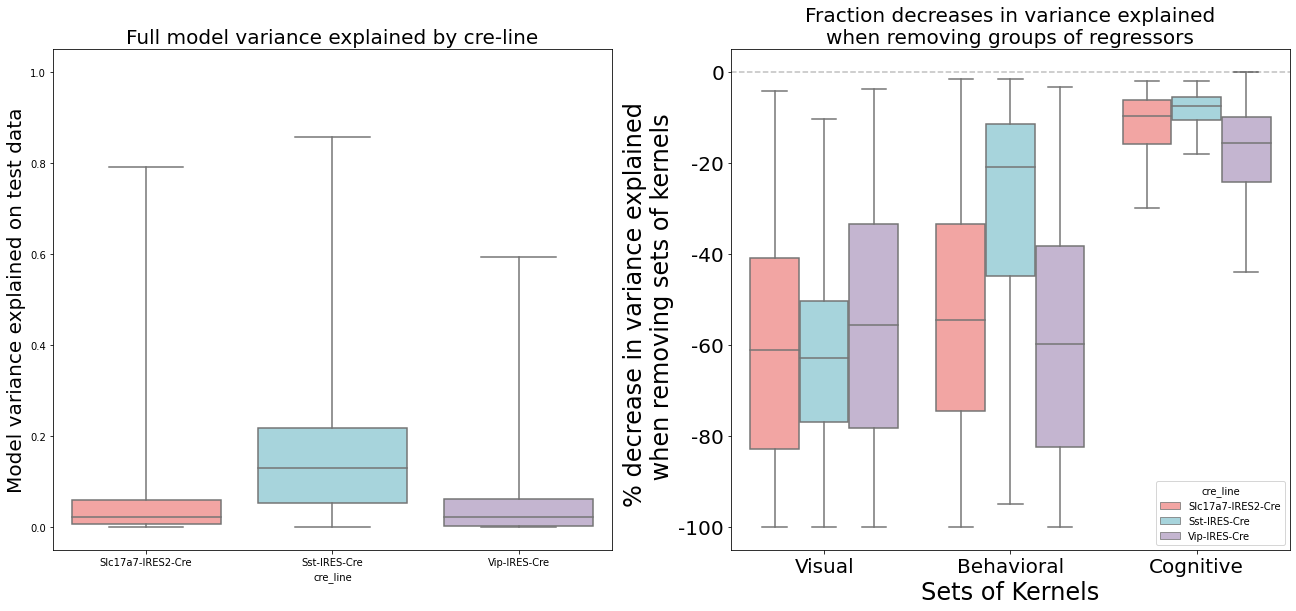

In [36]:
fig,ax = plt.subplots(1, 2, figsize=(18,8))
colors = gvt.project_colors()

sns.boxplot(
    data = results,
    y='Full__avg_cv_var_test',
    x='cre_line',
    order=np.sort(results['cre_line'].unique()),
    whis=np.inf,
    ax=ax[0],
    palette = [colors['slc'],colors['sst'],colors['vip']]
)
gvt.cosyne_make_dropout_summary_plot(dropout_summary, ax=ax[1],palette = [colors['slc'],colors['sst'],colors['vip']])

ax[0].set_ylim(-0.05,1.05)
ax[0].set_ylabel('Model variance explained on test data',fontsize=20)
ax[0].set_title('Full model variance explained by cre-line',fontsize=20)
ax[1].set_title('Fraction decreases in variance explained\nwhen removing groups of regressors',fontsize=20)

In [28]:
colors = gvt.project_colors()
[colors['slc'],colors['sst'],colors['vip']]

[(1.0, 0.596078431372549, 0.5882352941176471),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589)]

In [34]:
results.query('Full__avg_cv_var_test > 0.01')['Full__avg_cv_var_test'].describe()

count    64211.000000
mean         0.077453
std          0.092665
min          0.010001
25%          0.021715
50%          0.042085
75%          0.094445
max          0.856797
Name: Full__avg_cv_var_test, dtype: float64

In [33]:
results.groupby('cre_line')['Full__avg_cv_var_test'].describe()

,count,mean,std,min,25%,50%,75%,max
cre_line,,,,,,,,
Slc17a7-IRES2-Cre,80643.0,0.052530,0.081715,0.0,0.007350,0.022939,0.060090,0.791225
Sst-IRES-Cre,2887.0,0.158085,0.141098,0.0,0.052631,0.128727,0.218527,0.856797
Vip-IRES-Cre,8435.0,0.044303,0.059641,0.0,0.003163,0.021046,0.061876,0.593113
